In [1]:
# import librearies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("C:/Users/HP/Desktop/kani/guvi/Project/Powerplus/powerplus_dataset.csv")

In [5]:
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,5:24:00 PM,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,5:25:00 PM,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,5:26:00 PM,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,5:27:00 PM,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,5:28:00 PM,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,16/12/2006,5:29:00 PM,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,16/12/2006,5:30:00 PM,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,16/12/2006,5:31:00 PM,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,16/12/2006,5:32:00 PM,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,16/12/2006,5:33:00 PM,3.662,0.510,233.86,15.8,0.0,2.0,16.0


In [7]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06
mean,1.108202e+00,1.182732e-01,2.399598e+02,4.718123e+00,1.177451e+00,1.475177e+00,5.933837e+00
std,1.129546e+00,1.095062e-01,3.284504e+00,4.763588e+00,6.321183e+00,6.352703e+00,8.210398e+00
min,7.600000e-02,0.000000e+00,2.234900e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.880000e-01,0.000000e+00,2.379700e+02,1.200000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.500000e-01,9.800000e-02,2.402100e+02,2.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.544000e+00,1.860000e-01,2.421400e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.067000e+01,1.390000e+00,2.521400e+02,4.640000e+01,8.000000e+01,7.800000e+01,3.100000e+01


In [9]:
df.shape

(1048575, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1048575 non-null  object 
 1   Time                   1048575 non-null  object 
 2   Global_active_power    1044506 non-null  float64
 3   Global_reactive_power  1044506 non-null  float64
 4   Voltage                1044506 non-null  float64
 5   Global_intensity       1044506 non-null  float64
 6   Sub_metering_1         1044506 non-null  float64
 7   Sub_metering_2         1044506 non-null  float64
 8   Sub_metering_3         1044506 non-null  float64
dtypes: float64(7), object(2)
memory usage: 72.0+ MB


In [13]:
df['Date']=pd.to_datetime(df['Date'])
df['Time']=pd.to_datetime(df['Time'], format='%I:%M:%S %p', errors= 'coerce')

C:\Users\HP\AppData\Local\Temp\ipykernel_14352\2050657242.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date']=pd.to_datetime(df['Date'])


In [15]:
# daily averages for global active power
daily_avg = df.groupby(df['Date'].dt.date)['Global_active_power'].mean()
df['daily_avg_power']= df['Date'].dt.date.map(daily_avg)

# hour
df['hour']= df['Time'].apply (lambda x:x.hour)
df['peak_hour']= df['hour'].apply(lambda x: 1 if 16 <= x <= 24 else 0)

# 7-day-rolling-average-power
df['7_days_rolling_avg_power'] = df['Global_active_power'].rolling(window=7).mean()

# weekend means 1,weekdays = 0
df['is_weekend'] = df['Date'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)

# 5. **Season** (1: Winter, 2: Spring, 3: Summer, 4: Fall)
df['season']= df['Date'].dt.month % 12 // 3+1

print(df.head(5))

        Date                Time  Global_active_power  Global_reactive_power  \
0 2006-12-16 1900-01-01 17:24:00                4.216                  0.418   
1 2006-12-16 1900-01-01 17:25:00                5.360                  0.436   
2 2006-12-16 1900-01-01 17:26:00                5.374                  0.498   
3 2006-12-16 1900-01-01 17:27:00                5.388                  0.502   
4 2006-12-16 1900-01-01 17:28:00                3.666                  0.528   

   Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0   234.84              18.4             0.0             1.0            17.0   
1   233.63              23.0             0.0             1.0            16.0   
2   233.29              23.0             0.0             2.0            17.0   
3   233.74              23.0             0.0             1.0            17.0   
4   235.68              15.8             0.0             1.0            17.0   

   daily_avg_power  hour  peak_hour  7

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   Date                      1048575 non-null  datetime64[ns]
 1   Time                      1048575 non-null  datetime64[ns]
 2   Global_active_power       1044506 non-null  float64       
 3   Global_reactive_power     1044506 non-null  float64       
 4   Voltage                   1044506 non-null  float64       
 5   Global_intensity          1044506 non-null  float64       
 6   Sub_metering_1            1044506 non-null  float64       
 7   Sub_metering_2            1044506 non-null  float64       
 8   Sub_metering_3            1044506 non-null  float64       
 9   daily_avg_power           1047135 non-null  float64       
 10  hour                      1048575 non-null  int64         
 11  peak_hour                 1048575 non-null  int64 

In [21]:
# Impute missing values in numerical columns with the median

columns_to_impute = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                     'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'daily_avg_power', 'hour', 'peak_hour', 
                     '7_days_rolling_avg_power', 'is_weekend', 'season']
# Loop through each column and apply median imputation
for column in columns_to_impute:
    median_values= df[column].median()
    df[column].fillna(median_values, inplace = True)
print(df.isnull().sum())    


C:\Users\HP\AppData\Local\Temp\ipykernel_14352\970490991.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_values, inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_14352\970490991.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3              0
daily_avg_power             0
hour                        0
peak_hour                   0
7_days_rolling_avg_power    0
is_weekend                  0
season                      0
dtype: int64


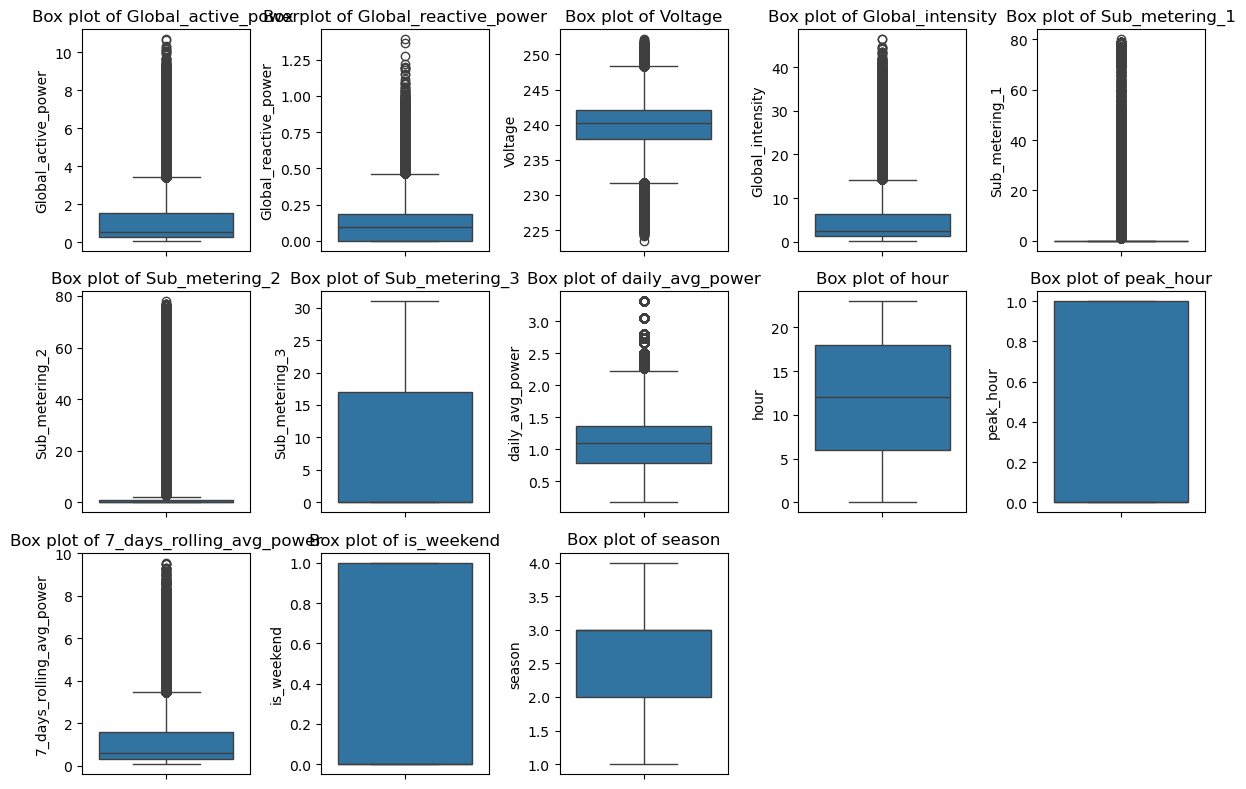

In [23]:
#Plotting boxplots for each numerical column
plt.figure(figsize = (12,8))

columns_to_plot = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                     'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'daily_avg_power', 'hour', 'peak_hour', 
                     '7_days_rolling_avg_power', 'is_weekend', 'season']

for i,column in enumerate(columns_to_plot,1):
    plt.subplot(3,5,i)
    sns.boxplot(data=df[column])
    plt.title(f'Box plot of {column}')
    
plt.tight_layout()
plt.show()


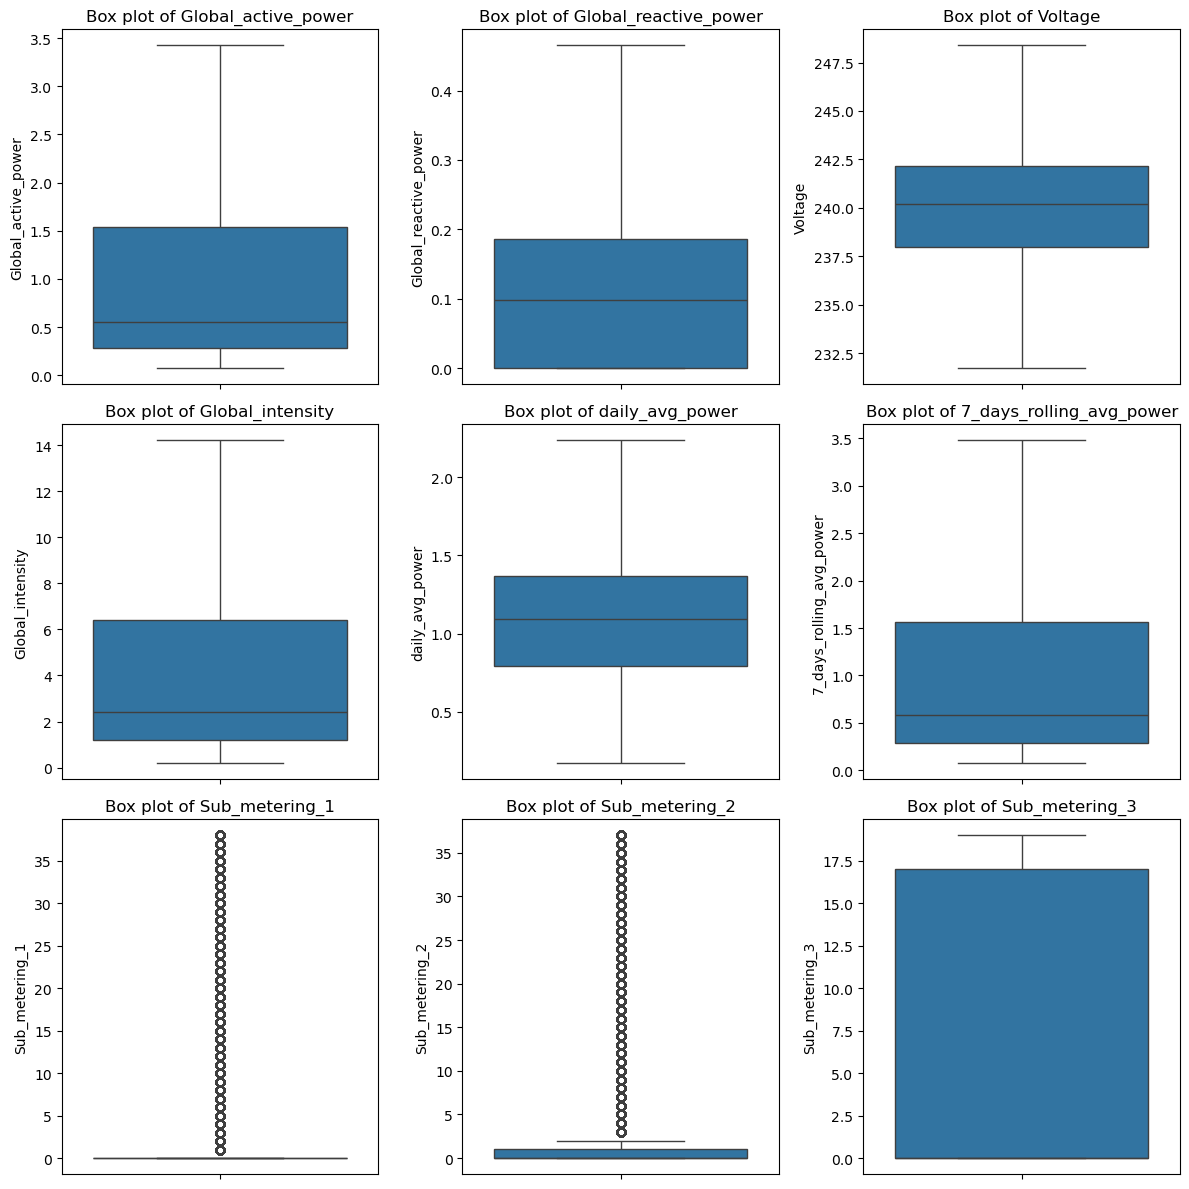

In [25]:
columns_to_process =['Global_active_power', 'Global_reactive_power', 'Voltage', 
                     'Global_intensity', 'daily_avg_power',  
                     '7_days_rolling_avg_power']
for column in columns_to_process:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df[column]=df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x <lower_bound else x))

sparse_columns = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for column in sparse_columns:
    # Use percentile method or log transformation
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)
    
    # Capping at these values
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))



plt.figure(figsize=(12, 12))
for i, column in enumerate(columns_to_process + sparse_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df[column])
    plt.title(f"Box plot of {column}")
plt.tight_layout()
plt.show()
    

In [27]:
from sklearn.preprocessing import MinMaxScaler
columns_to_impute = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                     'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'daily_avg_power', 'hour', 'peak_hour', 
                     '7_days_rolling_avg_power', 'is_weekend', 'season']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[columns_to_impute])

df[columns_to_impute] = scaled_data.round(3)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   Date                      1048575 non-null  datetime64[ns]
 1   Time                      1048575 non-null  datetime64[ns]
 2   Global_active_power       1048575 non-null  float64       
 3   Global_reactive_power     1048575 non-null  float64       
 4   Voltage                   1048575 non-null  float64       
 5   Global_intensity          1048575 non-null  float64       
 6   Sub_metering_1            1048575 non-null  float64       
 7   Sub_metering_2            1048575 non-null  float64       
 8   Sub_metering_3            1048575 non-null  float64       
 9   daily_avg_power           1048575 non-null  float64       
 10  hour                      1048575 non-null  float64       
 11  peak_hour                 1048575 non-null  float6

In [31]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Global_active_power','Date','Time'])  # Drop the target column
y = df['Global_active_power']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# Initialize the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can tune n_estimators as needed

In [55]:
# Train the model on the training data
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [57]:
# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics for the training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Print the evaluation metrics for the training set
print("Training Set Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"R-squared (R²): {r2_train}")

# Calculate evaluation metrics for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print the evaluation metrics for the test set
print("\nTest Set Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"R-squared (R²): {r2_test}")

Training Set Evaluation:
Mean Absolute Error (MAE): 0.0011996263830044455
Mean Squared Error (MSE): 7.224338518931073e-06
Root Mean Squared Error (RMSE): 0.002687812962043876
R-squared (R²): 0.9999140616182735

Test Set Evaluation:
Mean Absolute Error (MAE): 0.0032502225616725354
Mean Squared Error (MSE): 5.385570990864228e-05
Root Mean Squared Error (RMSE): 0.007338644964068114
R-squared (R²): 0.999362365185083


In [33]:
######Nural Network

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
# Initialize the MLPRegressor model
model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, activation='relu', solver='adam', random_state=42)


In [37]:
# Train the model
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

In [39]:
# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

In [41]:
# Calculate evaluation metrics for the training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Print the evaluation metrics for the training set
print("Training Set Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"R-squared (R²): {r2_train}")

# Calculate evaluation metrics for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print the evaluation metrics for the test set
print("\nTest Set Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"R-squared (R²): {r2_test}")

Training Set Evaluation:
Mean Absolute Error (MAE): 0.00608232142854405
Mean Squared Error (MSE): 8.570798491198924e-05
Root Mean Squared Error (RMSE): 0.009257860709256174
R-squared (R²): 0.9989804456830097

Test Set Evaluation:
Mean Absolute Error (MAE): 0.006105205444269159
Mean Squared Error (MSE): 8.70552113430336e-05
Root Mean Squared Error (RMSE): 0.009330338222327934
R-squared (R²): 0.9989692934385893
